Analysis

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [142]:
df = pd.read_csv('data/clean_hayday_item_data.csv')
df.head()

,Name,Level,Price,Time (min),Source
0,Wheat,1,3,2,Field (1st crop)
1,Egg,1,18,20,Chicken (1st animal product)
2,Corn,2,7,5,Field (2nd crop)
3,Bread,2,21,5,Bakery
4,Chicken feed,3,7,5,Feed Mill


Filter level

In [143]:
max_level = 30

In [144]:
df = df[df['Level'] <= max_level]

In [145]:
print(df['Source'].value_counts())

Source
Pie Oven                        5
Bakery                          5
BBQ Grill                       5
Loom                            4
Feed Mill                       4
Cake Oven                       4
Juice Press                     3
Smelter                         3
Mine                            3
Dairy                           3
Sugar Mill                      3
Popcorn Pot                     3
Sewing Machine                  3
Net Maker                       2
Field (6th crop)                1
Field (12th crop)               1
Field (14th crop)               1
Ice Cream Maker                 1
Fish (5th animal product)       1
Lure Workbench (5)              1
Lure Workbench (4)              1
Lure Workbench (3)              1
Lure Workbench (2)              1
Lure Workbench                  1
Field (2nd crop)                1
Blackberry bush (13th crop)     1
Field (3rd crop)                1
Pig (3rd animal product)        1
Cow (2nd animal product)        1
Cherry 

In [146]:
machines = ['Sewing Machine', 'Loom', 'Sugar Mill', 'BBQ Grill', 'Popcorn Pot', 
            'Cake Oven', 'Bakery', 'Pie Oven', 'Dairy', 'Ice Cream Maker', 'Juice Press',]

Best for each machine by Price

In [147]:
most_profitable_items = []

for machine in machines:
    # Find the maximum price for the machine
    max_price = df[df['Source'] == machine]['Price'].max()
    # Get the items that have this maximum price
    max_price_items = df[(df['Source'] == machine) & (df['Price'] == max_price)]
    # Append the item names and their prices to the list
    for _, item in max_price_items.iterrows():
        most_profitable_items.append({'Machine':item['Source'],'Name': item['Name'], 'Price': item['Price']})

print(most_profitable_items)


[{'Machine': 'Sewing Machine', 'Name': 'Violet dress', 'Price': 327}, {'Machine': 'Loom', 'Name': 'Blue sweater', 'Price': 208}, {'Machine': 'Sugar Mill', 'Name': 'Syrup', 'Price': 90}, {'Machine': 'BBQ Grill', 'Name': 'Fish burger', 'Price': 226}, {'Machine': 'Popcorn Pot', 'Name': 'Buttered popcorn', 'Price': 126}, {'Machine': 'Cake Oven', 'Name': 'Cheesecake', 'Price': 284}, {'Machine': 'Bakery', 'Name': 'Blackberry muffin', 'Price': 226}, {'Machine': 'Pie Oven', 'Name': 'Apple pie', 'Price': 270}, {'Machine': 'Dairy', 'Name': 'Cheese', 'Price': 122}, {'Machine': 'Ice Cream Maker', 'Name': 'Vanilla ice cream', 'Price': 172}, {'Machine': 'Juice Press', 'Name': 'Cherry juice', 'Price': 216}]


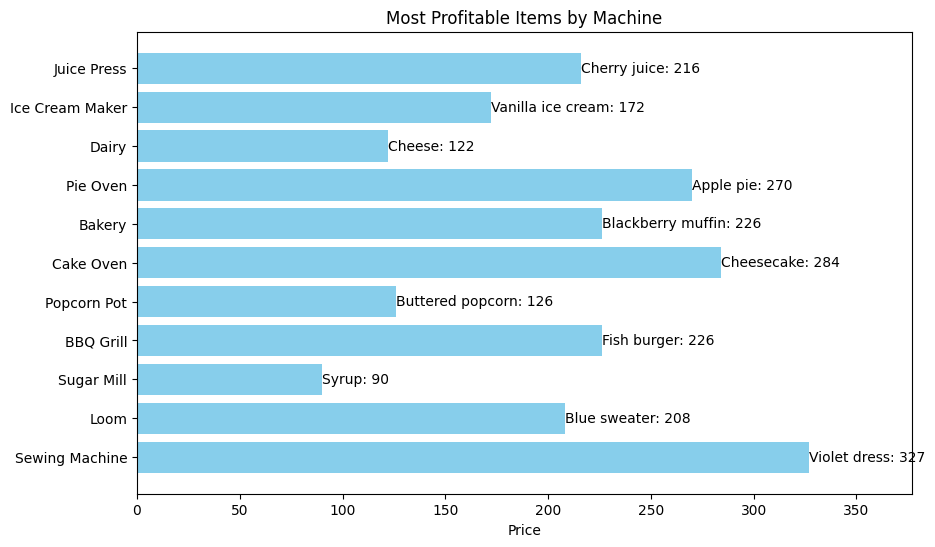

In [148]:
prices = [item['Price'] for item in most_profitable_items]
names = [item['Name'] for item in most_profitable_items]
# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.barh(machines, prices, color='skyblue')
plt.xlabel('Price')
plt.title('Most Profitable Items by Machine')
plt.xlim(0, max(prices) + 50)  # Adding some space on the right
# plt.grid(axis='x')

# Annotate bars with the item name and price
for i, (name, price) in enumerate(zip(names, prices)):
    plt.text(price, i, f'{name}: {price}', va='center')

plt.show()

Top 3 By Price

In [149]:
most_profitable_items = []

for machine in machines:
    # Get items for the current machine
    machine_items = df[df['Source'] == machine]
    # Sort items by price and get the top 3
    top_items = machine_items.nlargest(3, 'Price')
    
    # Append the results to the list
    for _, item in top_items.iterrows():
        most_profitable_items.append({
            'Machine': machine,
            'Name': item['Name'],
            'Price': item['Price']
        })

print(most_profitable_items)


[{'Machine': 'Sewing Machine', 'Name': 'Violet dress', 'Price': 327}, {'Machine': 'Sewing Machine', 'Name': 'Wooly chaps', 'Price': 309}, {'Machine': 'Sewing Machine', 'Name': 'Cotton shirt', 'Price': 241}, {'Machine': 'Loom', 'Name': 'Blue sweater', 'Price': 208}, {'Machine': 'Loom', 'Name': 'Sweater', 'Price': 151}, {'Machine': 'Loom', 'Name': 'Blue woolly hat', 'Price': 111}, {'Machine': 'Sugar Mill', 'Name': 'Syrup', 'Price': 90}, {'Machine': 'Sugar Mill', 'Name': 'White sugar', 'Price': 50}, {'Machine': 'Sugar Mill', 'Name': 'Brown sugar', 'Price': 32}, {'Machine': 'BBQ Grill', 'Name': 'Fish burger', 'Price': 226}, {'Machine': 'BBQ Grill', 'Name': 'Bacon and eggs', 'Price': 201}, {'Machine': 'BBQ Grill', 'Name': 'Hamburger', 'Price': 180}, {'Machine': 'Popcorn Pot', 'Name': 'Buttered popcorn', 'Price': 126}, {'Machine': 'Popcorn Pot', 'Name': 'Chili popcorn', 'Price': 122}, {'Machine': 'Popcorn Pot', 'Name': 'Popcorn', 'Price': 32}, {'Machine': 'Cake Oven', 'Name': 'Cheesecake', '

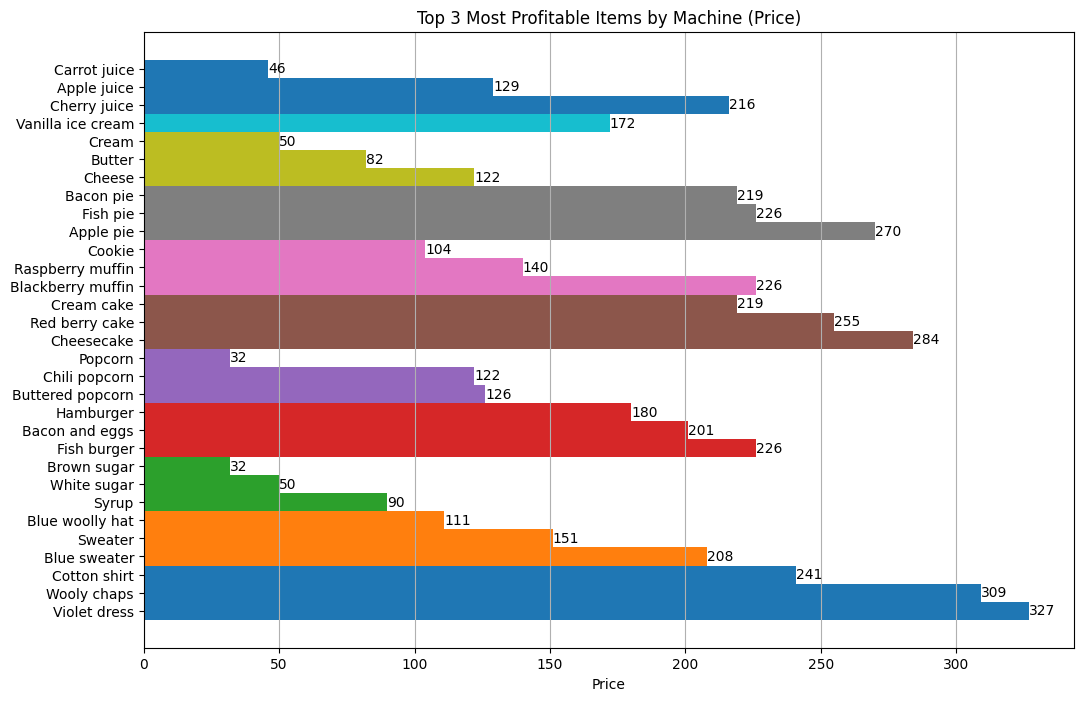

In [150]:

# Assuming most_profitable_items contains the top items from the previous code
df_profitable = pd.DataFrame(most_profitable_items)

plt.figure(figsize=(12, 8))  # Increase figure size for better visibility

# Create a bar plot for each machine and its top items
bar_height = 1  # Height of the bars
gap = 4      # Gap between bars

# Create a list to store the y-ticks
y_ticks = []

for machine in df_profitable['Machine'].unique():
    subset = df_profitable[df_profitable['Machine'] == machine]
    # Calculate the y positions with a gap
    y_pos = range(len(y_ticks), len(y_ticks) + len(subset))
    y_ticks.extend(subset['Name'])
    
    bars = plt.barh(y_pos, subset['Price'], label=machine, height=bar_height)  # Wider bars

    # Annotate the price on the bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center')

plt.yticks(range(len(y_ticks)), y_ticks)  # Set y-ticks with item names
plt.xlabel('Price')
plt.title('Top 3 Most Profitable Items by Machine (Price)')
# plt.legend(title='Machine')
plt.grid(axis='x')
plt.show()


Top 3 By Price/Duration

In [151]:
df['Ratio'] = df['Price'] / (df['Time (min)']**0.3)

In [152]:
most_profitable_items = []



for machine in machines:
    # Get items for the current machine
    machine_items = df[df['Source'] == machine]
    # Sort items by price and get the top 3
    top_items = machine_items.nlargest(3, 'Ratio')
    
    # Append the results to the list
    for _, item in top_items.iterrows():
        most_profitable_items.append({
            'Machine': machine,
            'Name': item['Name'],
            'Ratio': round(item['Ratio'], 1)
        })

print(most_profitable_items)


[{'Machine': 'Sewing Machine', 'Name': 'Wooly chaps', 'Ratio': 80.1}, {'Machine': 'Sewing Machine', 'Name': 'Cotton shirt', 'Ratio': 76.9}, {'Machine': 'Sewing Machine', 'Name': 'Violet dress', 'Ratio': 75.1}, {'Machine': 'Loom', 'Name': 'Blue sweater', 'Ratio': 43.8}, {'Machine': 'Loom', 'Name': 'Cotton fabric', 'Ratio': 38.9}, {'Machine': 'Loom', 'Name': 'Sweater', 'Ratio': 35.9}, {'Machine': 'Sugar Mill', 'Name': 'Syrup', 'Ratio': 23.3}, {'Machine': 'Sugar Mill', 'Name': 'White sugar', 'Ratio': 16.5}, {'Machine': 'Sugar Mill', 'Name': 'Brown sugar', 'Ratio': 13.0}, {'Machine': 'BBQ Grill', 'Name': 'Bacon and eggs', 'Ratio': 58.9}, {'Machine': 'BBQ Grill', 'Name': 'Fish burger', 'Ratio': 53.7}, {'Machine': 'BBQ Grill', 'Name': 'Hamburger', 'Ratio': 42.8}, {'Machine': 'Popcorn Pot', 'Name': 'Buttered popcorn', 'Ratio': 36.9}, {'Machine': 'Popcorn Pot', 'Name': 'Chili popcorn', 'Ratio': 29.0}, {'Machine': 'Popcorn Pot', 'Name': 'Popcorn', 'Ratio': 11.5}, {'Machine': 'Cake Oven', 'Name'

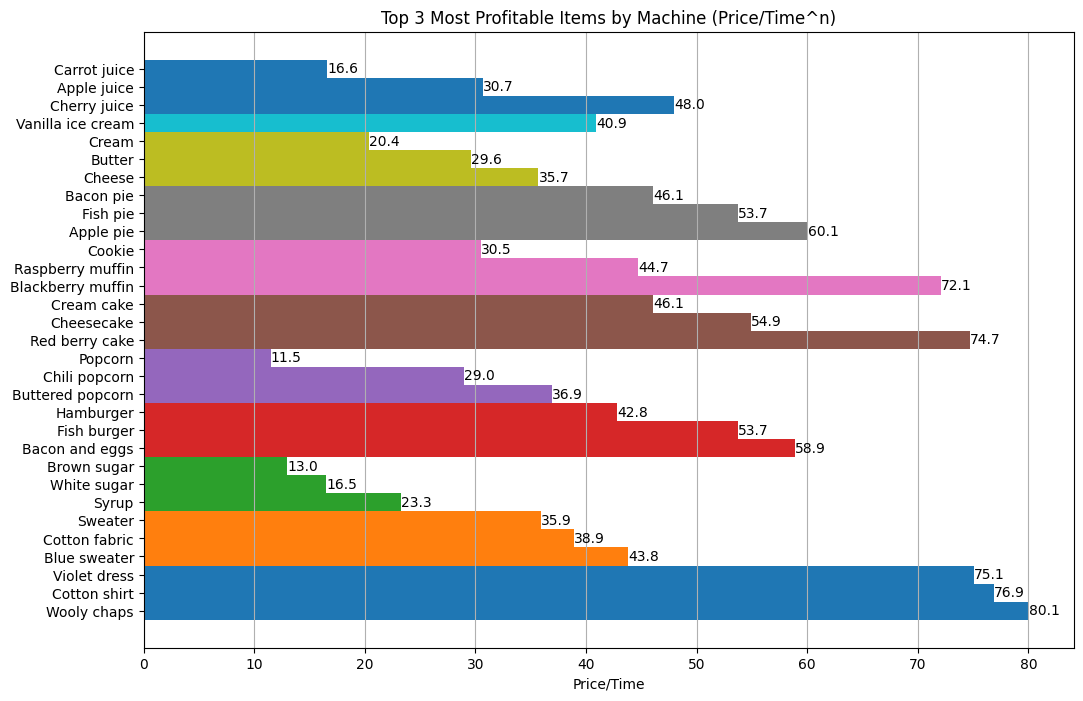

In [153]:
# Assuming most_profitable_items contains the top items from the previous code
df_profitable = pd.DataFrame(most_profitable_items)

plt.figure(figsize=(12, 8))  # Increase figure size for better visibility

# Create a bar plot for each machine and its top items
bar_height = 1  # Height of the bars
gap = 4      # Gap between bars

# Create a list to store the y-ticks
y_ticks = []

for machine in df_profitable['Machine'].unique():
    subset = df_profitable[df_profitable['Machine'] == machine]
    # Calculate the y positions with a gap
    y_pos = range(len(y_ticks), len(y_ticks) + len(subset))
    y_ticks.extend(subset['Name'])
    
    bars = plt.barh(y_pos, subset['Ratio'], label=machine, height=bar_height)  # Wider bars

    # Annotate the price on the bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center')

plt.yticks(range(len(y_ticks)), y_ticks)  # Set y-ticks with item names
plt.xlabel('Price/Time')
plt.title('Top 3 Most Profitable Items by Machine (Price/Time^n)')
# plt.legend(title='Machine')
plt.grid(axis='x')
plt.show()
